In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("covid_data.csv")#, parse_dates = ['Date'])
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [8]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [10]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       321 non-null    datetime64[ns]
 1   State      140 non-null    object        
 2   Region     321 non-null    object        
 3   Confirmed  321 non-null    int64         
 4   Deaths     321 non-null    int64         
 5   Recovered  321 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 15.2+ KB


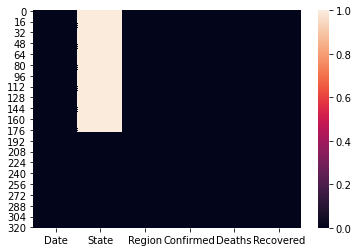

In [26]:
sns.heatmap(data.isnull())
plt.show()

## 1. Show the number of Confirmed, Death and Recovered Cases in each regions

In [59]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7


In [70]:
data.groupby('Region')[['Confirmed','Deaths','Recovered']].sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
Venezuela,331,10,142
Vietnam,270,0,222
West Bank and Gaza,344,2,71


In [7]:
list(data['Region'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland

In [36]:
data['Region'].nunique()

187

## 2. Remove all the records where Confimed Cases are less than 10

In [40]:
data.head(2)

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455


In [55]:
data=data[data['Confirmed'] > 10]
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,2020-04-29,NaN,Afghanistan,1939,60,252
1,2020-04-29,NaN,Albania,766,30,455
2,2020-04-29,NaN,Algeria,3848,444,1702
3,2020-04-29,NaN,Andorra,743,42,423
4,2020-04-29,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,2020-04-29,Wyoming,US,545,7,0
317,2020-04-29,Xinjiang,Mainland China,76,3,73
318,2020-04-29,Yukon,Canada,11,0,0
319,2020-04-29,Yunnan,Mainland China,185,2,181


## 3. Maximum number of Confirmed Cases and in what Region

In [67]:
max = data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).to_frame()
max#.head(1)

,Confirmed
Region,
US,1039909
Spain,236899
Italy,203591
France,166536
UK,166432
...,...
Dominica,16
Saint Kitts and Nevis,15
Nicaragua,13


In [57]:
data.groupby('Region').sum().sort_values('Confirmed',ascending=False)

,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,0
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166536,24121,49112
UK,166432,26165,851
...,...,...,...
Dominica,16,0,13
Saint Kitts and Nevis,15,0,4
Nicaragua,13,3,7


## 4. In what Region was the minimum number of Death recorded

In [77]:
min = data.groupby('Region')['Deaths'].sum().sort_values(ascending=True).to_frame()

In [79]:
min.head(20)

,Deaths
Region,
Laos,0
Mongolia,0
Mozambique,0
Cambodia,0
Fiji,0
Namibia,0
Nepal,0
Madagascar,0
Macau,0


## 5. How many confirmed cases, death and recoveried were recorded till 29th April 2020 in India

In [80]:
data[data['Region'] == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,2020-04-29,NaN,India,33062,1079,8437


In [87]:
data[data['Region'].str.contains('ndia')]

,Date,State,Region,Confirmed,Deaths,Recovered
74,2020-04-29,NaN,India,33062,1079,8437


In [81]:
#in this case we notice that the date is the same but in a case whereby the dates are ranged and we info about a particular timeframe
# we could mabe ue the .between



#data[data['Region'] == 'India'].between('2020-04-29' , '2020-05-29')

## 6A. Sort the entire data with number of confirmed cases in ascending order

In [89]:
data.sort_values('Confirmed',ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,2020-04-29,Recovered,US,0,0,120720
284,2020-04-29,Recovered,Canada,0,0,20327
203,2020-04-29,Diamond Princess cruise ship,Canada,0,1,0
305,2020-04-29,Tibet,Mainland China,1,0,1
289,2020-04-29,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,2020-04-29,NaN,France,165093,24087,48228
168,2020-04-29,NaN,UK,165221,26097,0
80,2020-04-29,NaN,Italy,203591,27682,71252
153,2020-04-29,NaN,Spain,236899,24275,132929


## 6B. Sort the entire data with number of recovered cases in descending order

In [93]:
data.sort_values('Recovered',ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,2020-04-29,NaN,Spain,236899,24275,132929
285,2020-04-29,Recovered,US,0,0,120720
61,2020-04-29,NaN,Germany,161539,6467,120400
76,2020-04-29,NaN,Iran,93657,5957,73791
80,2020-04-29,NaN,Italy,203591,27682,71252
...,...,...,...,...,...,...
248,2020-04-29,Maryland,US,20849,1078,0
246,2020-04-29,Manitoba,Canada,275,6,0
243,2020-04-29,Louisiana,US,27660,1845,0
241,2020-04-29,Kentucky,US,4537,234,0


ValueError: Boolean array expected for the condition, not datetime64[ns]